In [1]:
import torch

# 创建tensor

In [2]:
d1 = torch.empty(5,3)
print(d1)

d2 = torch.rand(5,3)
print(d2)

d3 = torch.zeros(5,3,dtype=torch.long)
print(d3)

tensor([[ 0.0000e+00, -4.6566e-10, -8.0056e+35],
        [ 2.0005e+00, -3.5388e-15,  4.5827e-41],
        [-4.6756e-09,  4.5827e-41, -4.8469e-09],
        [ 4.5827e-41, -4.8284e-09,  4.5827e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])
tensor([[0.9040, 0.8543, 0.8167],
        [0.0348, 0.7146, 0.8695],
        [0.7103, 0.2694, 0.5766],
        [0.2369, 0.7654, 0.0539],
        [0.7801, 0.7943, 0.0169]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [3]:
# 直接用列表生成tensor
d4 = torch.tensor([5.5, 3])
print(d4)

tensor([5.5000, 3.0000])


In [6]:
# 根据一个tensor结构生成tensor
d5 = d4.new_ones(5, 3, dtype=torch.float64)  # 返回的tensor默认具有相同的torch.dtype和torch.device
print(d5)
d6 = torch.randn_like(d5, dtype=torch.float) # 指定新的数据类型
print(d6) 
print(d6.size())
print(d6.shape)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-2.4401e-01,  4.9122e-01,  7.9648e-01],
        [-2.0956e+00,  1.2356e-03,  7.7987e-01],
        [ 8.1261e-01, -4.5463e-01, -5.5748e-01],
        [-1.3545e-01,  1.5463e-01, -1.3828e+00],
        [-2.7780e-01, -1.4737e+00, -1.8774e-01]])
torch.Size([5, 3])
torch.Size([5, 3])


### 算术操作

In [7]:
#方法一
x = torch.rand(5, 3)
y = torch.rand(5, 3)
print(x + y)

#方法二
print(torch.add(x, y))
#方法二指定输出
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

#方法三：inplace
y.add_(x)
print(y)

tensor([[0.7905, 0.9354, 0.6323],
        [1.2088, 1.1665, 0.8346],
        [1.3025, 0.3499, 1.0694],
        [1.0850, 0.5493, 0.9310],
        [0.7390, 1.1585, 0.8233]])
tensor([[0.7905, 0.9354, 0.6323],
        [1.2088, 1.1665, 0.8346],
        [1.3025, 0.3499, 1.0694],
        [1.0850, 0.5493, 0.9310],
        [0.7390, 1.1585, 0.8233]])
tensor([[0.7905, 0.9354, 0.6323],
        [1.2088, 1.1665, 0.8346],
        [1.3025, 0.3499, 1.0694],
        [1.0850, 0.5493, 0.9310],
        [0.7390, 1.1585, 0.8233]])
tensor([[0.7905, 0.9354, 0.6323],
        [1.2088, 1.1665, 0.8346],
        [1.3025, 0.3499, 1.0694],
        [1.0850, 0.5493, 0.9310],
        [0.7390, 1.1585, 0.8233]])


### 索引

In [8]:
y = x[0, :]
y += 1
print(y)
print(x[0, :]) # 源tensor也被改了

tensor([1.6898, 1.8217, 1.4632])
tensor([1.6898, 1.8217, 1.4632])


### 改变形状

In [10]:
y = x.view(15)
z = x.view(-1,5) # -1所指的维度可以根据其他维度的值推出来
print(x.size(),y.size(),z.size())

torch.Size([5, 3]) torch.Size([15]) torch.Size([3, 5])


##### 注意view()返回的新Tensor与源Tensor虽然可能有不同的size，但是是共享data的，也即更改其中的一个，另外一个也会跟着改变。(顾名思义，view仅仅是改变了对这个张量的观察角度，内部数据并未改变)

In [11]:
x += 1
print(x)
print(y)

tensor([[2.6898, 2.8217, 2.4632],
        [1.4495, 1.2716, 1.7189],
        [1.7263, 1.1806, 1.9272],
        [1.4807, 1.1612, 1.6951],
        [1.5854, 1.5953, 1.5866]])
tensor([2.6898, 2.8217, 2.4632, 1.4495, 1.2716, 1.7189, 1.7263, 1.1806, 1.9272,
        1.4807, 1.1612, 1.6951, 1.5854, 1.5953, 1.5866])


###### 所以如果我们想返回一个真正新的副本（即不共享data内存），推荐先用clone创造一个副本然后再使用view

In [12]:
x_cp = x.clone().view(15)
x -= 1
print(x)
print(x_cp)

tensor([[1.6898, 1.8217, 1.4632],
        [0.4495, 0.2716, 0.7189],
        [0.7263, 0.1806, 0.9272],
        [0.4807, 0.1612, 0.6951],
        [0.5854, 0.5953, 0.5866]])
tensor([2.6898, 2.8217, 2.4632, 1.4495, 1.2716, 1.7189, 1.7263, 1.1806, 1.9272,
        1.4807, 1.1612, 1.6951, 1.5854, 1.5953, 1.5866])


###### 另外一个常用的函数就是item(), 它可以将一个标量Tensor转换成一个Python number：

In [14]:
x = torch.randn(1)
print(x)
print(x.item())


tensor([0.8438])
0.8438011407852173


### 线性代数
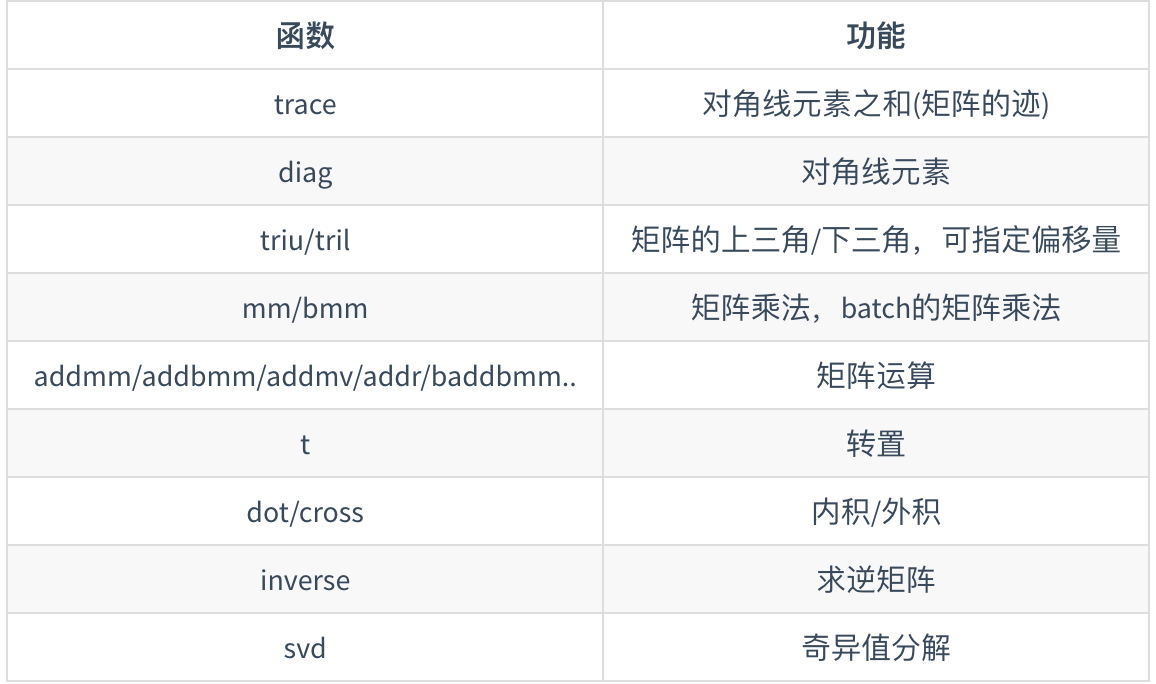
PyTorch中的Tensor支持超过一百种操作，包括转置、索引、切片、数学运算、线性代数、随机数等等，可参考官方文档。

# 广播机制

In [16]:
'''
由于x和y分别是1行2列和3行1列的矩阵，如果要计算x + y，那么x中第一行的2个元素被
广播（复制）到了第二行和第三行，而y中第一列的3个元素被广播（复制）到了第二列。如此，
就可以对2个3行2列的矩阵按元素相加。
'''
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


# 运算的内存开销

In [17]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y = y + x
print(id(y) == id_before) # False 

False


In [18]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y[:] = y + x
print(id(y) == id_before) # True

True


In [22]:
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
torch.add(x, y, out=y) # y += x, y.add_(x)
print(id(y) == id_before) # True

True


# Tensor和Numpy互换

In [23]:
# tensor专numpy
a = torch.ones(5)
b = a.numpy()
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


In [26]:
# numpy转tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


###### 所有在CPU上的Tensor（除了CharTensor）都支持与NumPy数组相互转换。此外上面提到还有一个常用的方法就是直接用torch.tensor()将NumPy数组转换成Tensor，需要注意的是该方法总是会进行数据拷贝，返回的Tensor和原来的数据不再共享内存。

In [29]:
c = torch.tensor(a)
a += 1
print(a, c)


[4. 4. 4. 4. 4.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


# Tenosr on GPU

In [30]:
# 以下代码只有在PyTorch GPU版本上才会执行
if torch.cuda.is_available():
    device = torch.device("cuda")          # GPU
    y = torch.ones_like(x, device=device)  # 直接创建一个在GPU上的Tensor
    x = x.to(device)                       # 等价于 .to("cuda")
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # to()还可以同时更改数据类型

In [31]:
torch.cuda.is_available()

False